In [51]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
%matplotlib inline

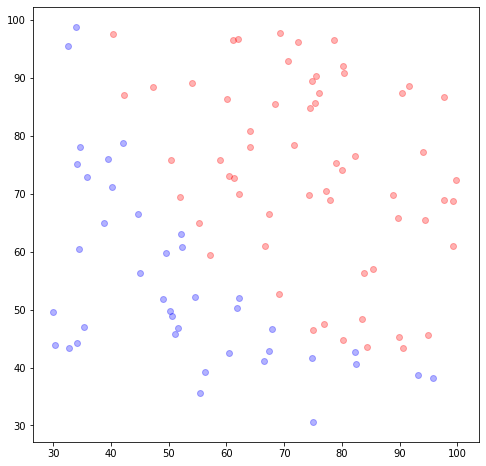

In [52]:
data    = np.genfromtxt("data.txt", delimiter=',')

x       = data[:, 0]
y       = data[:, 1]
label   = data[:, 2]

x_label0    = x[label == 0]
x_label1    = x[label == 1]

y_label0    = y[label == 0]
y_label1    = y[label == 1]

plt.figure(figsize=(8, 8))
plt.scatter(x_label0, y_label0, alpha=0.3, c='b')
plt.scatter(x_label1, y_label1, alpha=0.3, c='r')
plt.show()

In [63]:
def Z(theta0, theta1, theta2, x, y):
    return theta0 + theta1 * x + theta2 * y

def sigmoid(z):
    return (1 / (1 + np.exp(-z)))
    
def objective(theta0, theta1, theta2, m):
    epsilon = 1e-12
    result = 0
    for i in range(m):
        result += label[i]*np.log(1/(epsilon+sigmoid(Z(theta0,theta1,theta2,x[i],y[i])))) + (1-label[i])*np.log(1/(epsilon+1-sigmoid(Z(theta0,theta1,theta2,x[i],y[i]))))
    result = result / m
    return result

def grad(theta0,theta1,theta2,m,lr):
    temp = 0
    for i in range(m):
        temp += (sigmoid(Z(theta0,theta1,theta2,x[i],y[i]))-label[i])
    new_theta0 = theta0 - lr * temp / m
    
    temp = 0
    for i in range(m):
        temp += (sigmoid(Z(theta0,theta1,theta2,x[i],y[i]))-label[i])*x[i]
    new_theta1 = theta1- lr * temp / m
    
    temp = 0
    for i in range(m):
        temp += (sigmoid(Z(theta0,theta1,theta2,x[i],y[i]))-label[i])*y[i]
    new_theta2 = theta2 - lr * temp / m
    
    return new_theta0, new_theta1, new_theta2

In [81]:
m = data.size//3
lr = 0.0001
theta0, theta1,theta2 = 0, 5, 5
t0, t1, t2 = list(),list(),list()
loss = []
itercount = 0
itermax = 10000

while True:
    
    if itercount>itermax:
        break
    
    t0.append(theta0)
    t1.append(theta1)
    t2.append(theta2)
    loss.append(objective(theta0, theta1, theta2, m))
    theta0, theta1, theta2 = grad(theta0,theta1,theta2,m,lr)
    
    itercount += 1
    if loss[-1]<1 and abs(loss[-1]-loss[-2]) <0.00001:
        break
        
    

In [82]:
itercount

2920

In [87]:
(theta0 + theta1 * 100 + theta2 * 50)

1.214488105563147

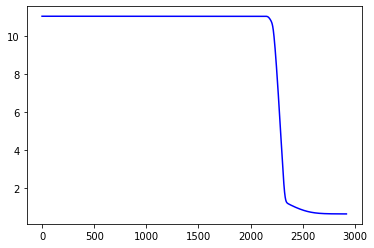

In [84]:
step = np.arange(0,itercount,1)
plt.plot(step,loss, c= 'b')

In [85]:
a = np.arange(-100,100,0.1)

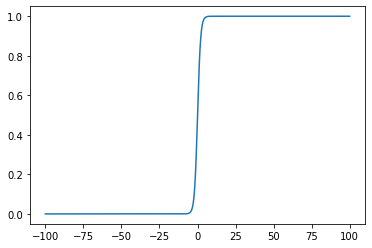

In [86]:
plt.plot(a,sigmoid(a))

In [70]:
sigmoid(-10)

4.5397868702434395e-05

In [71]:
objective(theta0,theta1,theta2,m)

0.6229872942404335

In [72]:
theta0,theta1,theta2

(-0.09872925667711646, 0.011668500596843642, 0.0006753194063506792)

In [73]:
np.log(1/sigmoid(Z(theta0,theta1,theta2,x[0],y[0])))

0.5300958024506074

In [74]:
objective(theta0, theta1, theta2, m)

0.6229872942404335

In [80]:
np.log(10)

2.302585092994046